<a href="https://colab.research.google.com/github/DaliaEl-Sayed/DEPI---Generative-AI-Track-Tasks./blob/main/mnist_dataset_using_encoder_decoder_task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
from keras.datasets import mnist
import numpy as np
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [46]:
# Normalize the input data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the data to 2D images
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

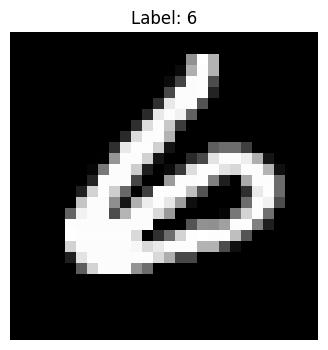

In [47]:
import matplotlib.pyplot as plt

# Display a sample image
sample_index = np.random.randint(0, len(X_train))
sample_image = X_train[sample_index]
sample_label = y_train[sample_index]

plt.figure(figsize=(4, 4))
plt.imshow(sample_image.squeeze(), cmap='gray')
plt.title(f"Label: {sample_label}")
plt.axis('off')
plt.show()

In [48]:
# Add noise to the training images
noise_factor = 0.3
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

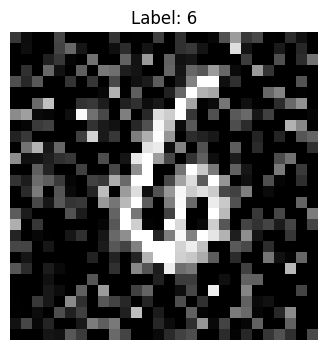

In [49]:
# Display a noise image
sample_index = np.random.randint(0, len(X_train))
sample_image = X_train_noisy[sample_index]
sample_label = y_train[sample_index]

plt.figure(figsize=(4, 4))
plt.imshow(sample_image.squeeze(), cmap='gray')
plt.title(f"Label: {sample_label}")
plt.axis('off')
plt.show()

In [50]:
# Define the autoencoder model
input_img = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Define the autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [51]:
# Train the autoencoder
autoencoder.fit(X_train_noisy, X_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(X_test_noisy, X_test))


Epoch 1/50
469/469 [==============================] - 10s 8ms/step - loss: 0.2268 - val_loss: 0.1685
Epoch 2/50
469/469 [==============================] - 4s 8ms/step - loss: 0.1569 - val_loss: 0.1454
Epoch 3/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1399 - val_loss: 0.1335
Epoch 4/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1309 - val_loss: 0.1272
Epoch 5/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1257 - val_loss: 0.1224
Epoch 6/50
469/469 [==============================] - 4s 8ms/step - loss: 0.1222 - val_loss: 0.1199
Epoch 7/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1197 - val_loss: 0.1174
Epoch 8/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1176 - val_loss: 0.1158
Epoch 9/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1160 - val_loss: 0.1143
Epoch 10/50
469/469 [==============================] - 4s 9ms/step - loss: 0.1147 - val_loss: 0.112

In [52]:
# Denoise a sample image
sample_index = 0
noisy_image = X_test_noisy[sample_index]
original_image = X_test[sample_index]
denoised_image = autoencoder.predict(noisy_image.reshape(1, 28, 28, 1))[0]


1/1 [==============================] - 2s 2s/step


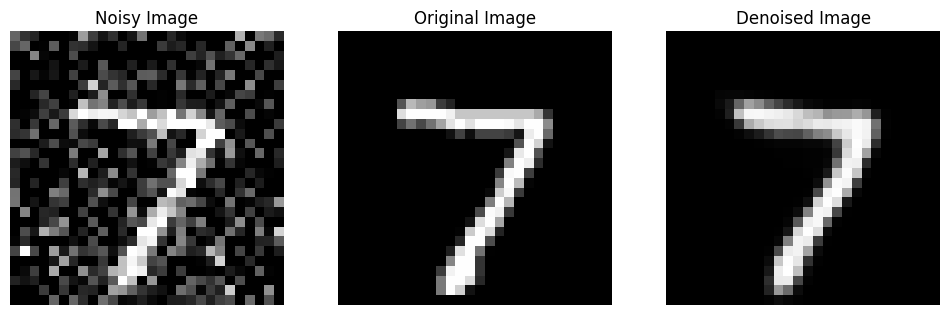

In [53]:
# Display the results
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(noisy_image, cmap='gray')
axes[0].set_title('Noisy Image')
axes[0].axis('off')

axes[1].imshow(original_image, cmap='gray')
axes[1].set_title('Original Image')
axes[1].axis('off')

axes[2].imshow(denoised_image, cmap='gray')
axes[2].set_title('Denoised Image')
axes[2].axis('off')

plt.show()